In [1]:
import csv
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import string
%matplotlib inline 

def cleanToLetters(str):
    remainingChars = []
    for ch in str:
        if (ch in string.ascii_letters or ch == ' '):
            remainingChars.append(ch)
    newString = string.join(remainingChars, "")
    return newString.lower()

def removeStopWords(str, set):
    toks = str.split()
    new_toks = []
    for elem in toks:
        if elem not in set:
            new_toks.append(elem)
    return string.join(new_toks, " ");

def printMostCommonWords(vectorizer, component):
    cuttOff = max(abs(component)) - 0.02
    for i in range(0, len(component)):
        if abs(component[i]) > cuttOff:
            for key, value in vectorizer.vocabulary_.iteritems():
                if (value == i):
                    print key

vectorizer = CountVectorizer(min_df=1, stop_words = 'english')
stop_words = vectorizer.get_stop_words()
#stop_words = ['you', 'the', 'and', 'a', 'an', 'how', 'as', 'or', 'we', 'i', 'be']

studentIds = []
passingIndicators = []
responses = []
rawReponses = []
grades = []
wordCounts = []
responses_w_stop_words = []
with open('schell10.txt', 'rb') as csvfile:
    responseReader = csv.reader(csvfile, delimiter="\t")
    i = 0
    for row in responseReader:
        studentId = row[0]
        course = row[6]
        numericGrade = row[9]
        letterGrade = row[10]
        response = row[13]
        
        if float(numericGrade) < 70:
            passingIndicator = 0
        else:
            passingIndicator = 1;
            
        if (True or course == 'M 408N'):
            if "xml" not in response and "0px" not in response and not "img" in response and len(cleanToLetters(response).strip()) > 3:
                studentIds.append(int(studentId))
                rawReponses.append(response)
                grades.append(float(numericGrade))
                cleaned = cleanToLetters(response)
                responses_w_stop_words.append(cleaned)
                wordCount = len(cleaned.split())
                wordCounts.append(wordCount)
                cleaned_no_stop_words = removeStopWords(cleaned, stop_words)
                responses.append(cleaned_no_stop_words)
                passingIndicators.append(passingIndicator)
                
data = {'studentId' : studentIds, 'grades' : grades, 'pass' : passingIndicators, 
        'responses' : responses, "raw" : rawReponses, 'wordCount' : wordCounts}
frame = pd.DataFrame(data)
frame.head()


,grades,pass,raw,responses,studentId,wordCount
0,73.533718,1,Finding all of the critical points. I'm also ...,finding critical points im little unsure suppo...,1345820,30
1,67.782127,0,Nothing,,1345878,1
2,32.561396,0,"<span id=""elementName"">Differentiating invers...",span idelementnamedifferentiating inverse trig...,1354739,5
3,78.082687,1,"I had trouble with the more complex problems,...",trouble complex problems problem slide,1345918,14
4,74.956839,1,How to find the derivative of an exponential ...,derivative exponential log form x,1348657,13


In [4]:
frame.describe()

,grades,pass,studentId,wordCount
count,18334.000000,18334.000000,1.833400e+04,18334.000000
mean,78.035907,0.760663,1.506489e+06,10.479546
std,12.322059,0.426690,1.132948e+05,10.607130
min,6.735532,0.000000,1.342816e+06,1.000000
25%,70.387700,1.000000,1.477380e+06,3.000000
50%,79.501637,1.000000,1.487328e+06,7.000000
75%,87.360813,1.000000,1.497610e+06,14.000000
max,99.470707,1.000000,1.862559e+06,134.000000


In [2]:

groupedStudentIds = []
groupedPassingIndicators = []
groupedResponses = []
groupedGrades = []
groupedWordCounts = []
for name, group in frame.groupby('studentId'):
    groupedStudentIds.append(name)
    groupedGrades.append(group['grades'].max())
    groupedPassingIndicators.append(group['pass'].max())
    groupedResponses.append(string.join(group['responses'].tolist(), ' '))
    groupedWordCounts.append(group['wordCount'].mean())

groupedData = {'studentId' : groupedStudentIds, 'grades' : groupedGrades, 
               'pass' : groupedPassingIndicators, 'responses' : groupedResponses,
               'wordCountMean' : groupedWordCounts}
groupedFrame = pd.DataFrame(groupedData)
groupedFrame.head()


,grades,pass,responses,studentId,wordCountMean
0,62.016893,0,slide questions slide slide questions questio...,1342816,1.722222
1,62.328071,0,derivative graphs finding critical points ...,1342818,4.916667
2,75.862258,1,,1342819,1.000000
3,74.282790,1,weeeeeeeeee think im good just little confused...,1342820,7.500000
4,84.774601,1,differentiability finally really differences...,1342821,11.571429


In [3]:
groupedFrame.describe()

,grades,pass,studentId,wordCountMean
count,1515.000000,1515.000000,1.515000e+03,1515.000000
mean,77.273222,0.744554,1.575772e+06,11.709455
std,13.532609,0.436255,1.595161e+05,8.958208
min,6.735532,0.000000,1.342816e+06,1.000000
25%,69.781362,0.000000,1.486776e+06,5.734615
50%,78.977812,1.000000,1.489398e+06,10.000000
75%,87.141293,1.000000,1.778722e+06,15.042727
max,99.470707,1.000000,1.862559e+06,80.750000


In [5]:
vectorizer = CountVectorizer(min_df=8, max_df = 0.05, ngram_range = (1, 4))
wordVector = vectorizer.fit_transform(groupedResponses)
vectorizer.vocabulary_


{u'dne': 451,
 u'esupxsup': 513,
 u'master': 1077,
 u'fundamental theorem': 675,
 u'trig functions just': 1730,
 u'macho': 1062,
 u'exact': 518,
 u'following': 611,
 u'im somewhat': 817,
 u'local max': 1026,
 u'graphed': 719,
 u'graphs derivatives': 726,
 u'tricky': 1720,
 u'tricks': 1719,
 u'factoring': 552,
 u'learn': 930,
 u'integrals antiderivatives': 866,
 u'needed': 1191,
 u'calculations': 118,
 u'wording': 1899,
 u'couple': 331,
 u'antiderivatives integrals': 44,
 u'using product': 1849,
 u'saying': 1507,
 u'confused need': 253,
 u'funtion': 677,
 u'makes': 1070,
 u'absolute minimum': 7,
 u'sure im': 1638,
 u'functions confused': 646,
 u'trying': 1747,
 u'guessing': 740,
 u'types discontinuity': 1755,
 u'equals': 502,
 u'fully understand': 626,
 u'confused got': 217,
 u'endpoints': 497,
 u'understand concepts': 1766,
 u'extra': 544,
 u'ended': 496,
 u'understood understood': 1824,
 u'tomorrow': 1711,
 u'grasping': 729,
 u'practice confused': 1271,
 u'absolute maximum': 6,
 u'equ

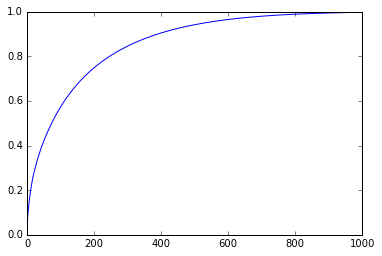

In [6]:
# View the accumulated sum of the eigenvalue ratios looking for the "elbow" to use as a cut off
pca = PCA(n_components=1000)
pca.fit(wordVector.toarray())

l = []
for i in range(0, len(pca.explained_variance_ratio_)):
    accumulatedVariance = sum(pca.explained_variance_ratio_[0:(i+1)])
    l.append(accumulatedVariance)
             
s = pd.Series(l)
s.plot()

In [12]:
# Obtain the base vectors for a 150 dimensional space.
pca = PCA(n_components=300)
pca.fit(wordVector.toarray())
wordVectorReduced = pca.transform(wordVector.toarray())


In [13]:
print "Common words in component 0:"
printMostCommonWords(vectorizer, pca.components_[0])
print "Common words in component 1:"
printMostCommonWords(vectorizer, pca.components_[1])
print "Common words in component 2:"
printMostCommonWords(vectorizer, pca.components_[2])
print "Common words in component 3:"
printMostCommonWords(vectorizer, pca.components_[3])
print "Common words in component 4:"
printMostCommonWords(vectorizer, pca.components_[4])

Common words in component 0:
module understand
understand learning
understand learning module
Common words in component 1:
module understood
understood module
Common words in component 2:
module understood
Common words in component 3:
im good
Common words in component 4:
comfortable
explained


model MSE: 148.12221388
MSE from average: 183.010639104


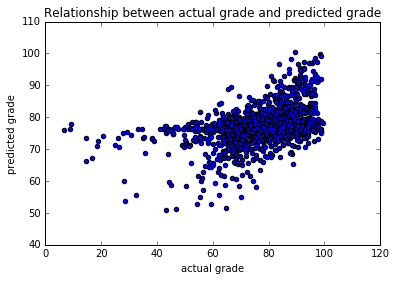

In [14]:
Y = np.array(groupedGrades, dtype = float)
X = pd.DataFrame(wordVectorReduced)
lm = LinearRegression()
lm.fit(X, Y)
groupedFrame["Predicted Grade"] = lm.predict(X)

plt.scatter(Y, lm.predict(X))
plt.xlabel("actual grade")
plt.ylabel("predicted grade")
plt.title("Relationship between actual grade and predicted grade")

print "model MSE:", np.mean((Y - lm.predict(X)) ** 2)
print "MSE from average:", np.mean((Y - np.mean(Y)) ** 2)


In [15]:
clf = LogisticRegression()
Y = np.array(groupedPassingIndicators, dtype = float)
clf.fit(X, Y)
groupedFrame["Pass Probabiliy"] = [x[1] for x in clf.predict_proba(X)]
groupedFrame.to_csv('predictions.csv')


In [16]:
groupedFrame.describe()

,grades,pass,studentId,wordCountMean,Predicted Grade,Pass Probabiliy
count,1515.000000,1515.000000,1.515000e+03,1515.000000,1515.000000,1515.000000
mean,77.273222,0.744554,1.575772e+06,11.709455,77.273222,0.743456
std,13.532609,0.436255,1.595161e+05,8.958208,5.908593,0.201781
min,6.735532,0.000000,1.342816e+06,1.000000,50.824555,0.000010
25%,69.781362,0.000000,1.486776e+06,5.734615,75.215439,0.682290
50%,78.977812,1.000000,1.489398e+06,10.000000,76.607661,0.757016
75%,87.141293,1.000000,1.778722e+06,15.042727,79.085614,0.879007
max,99.470707,1.000000,1.862559e+06,80.750000,100.550220,1.000000
